# Approximation of function via integrals and legendre polynomial

Copyright 2025 Stephan Kulla ("Kulla")

Licensed under the Apache License, Version 2.0 (the "Apache License") and Creative Commons Attribution 4.0 International (the "CC-BY License"). You may choose either of these licenses to govern your use of this project.

You may obtain a copy of the Apache License at:
    http://www.apache.org/licenses/LICENSE-2.0

You may obtain a copy of the CC-BY License at:
    https://creativecommons.org/licenses/by/4.0/

Unless required by applicable law or agreed to in writing, software and content distributed under the Apache License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the Apache License for the specific language governing permissions and limitations under the License.

Under the CC-BY License, you are free to share and adapt the material provided you give appropriate credit, provide a link to the license, and indicate if changes were made. See the CC-BY License for full details.

Third-Party Components and Licenses:
This product also includes third-party components which are distributed under their respective licenses. Please refer to the NOTICE file for details.

## Utility functions and imports

In [2]:
%load_ext jupyter_ai_magics

The jupyter_ai_magics extension is already loaded. To reload it, use:
  %reload_ext jupyter_ai_magics


## Display a sympy expression

In [36]:
import sympy as sp

from IPython.display import display, Markdown

sp.init_printing(use_latex='mathjax')

x= sp.symbols("x")

display(x**n)

 n
x 

## Get approximation based in integrals + given set of base

In [59]:
def get_integral(f, n, a, b):
    return sp.integrate((b-x)**n/sp.factorial(n)*f, (x,a,b))

def approx(func, base, n, a=-10, b=10, debug=False):
    if debug:
        display(Markdown(f"### Call {n}"))
    
    coefficients = sp.symbols(f"a0:{n+1}")
    approx_func = sum(coeff * base(i) for i, coeff in enumerate(coefficients))

    if debug:
        display("Approximation function:")
        display(approx_func)
    
    equations = [sp.Eq(get_integral(func, n, a, b), get_integral(approx_func, n, a, b)) for n in range(n+1)]

    if debug:
        display("Linear equation")
        for e in equations:
            display(e)

    params = sp.solve(equations, coefficients)

    if debug:
        display("Solution")
        display(params)
        
    solution = approx_func.subs(params)
    
    return solution

approx(sp.sin(x), lambda n: x**n, 0, debug=True)
display(approx(sp.sin(x), lambda n: x**n, 1, debug=True))
approx(sp.sin(x), lambda n: x**n, 3, debug=True)

### Call 0

'Approximation function:'

a₀

'Linear equation'

0 = 20⋅a₀

'Solution'

{a₀: 0}

### Call 1

'Approximation function:'

a₀ + a₁⋅x

'Linear equation'

0 = 20⋅a₀

                                  2000⋅a₁
20⋅cos(10) - 2⋅sin(10) = 200⋅a₀ - ───────
                                     3   

'Solution'

⎧           3⋅sin(10)   3⋅cos(10)⎫
⎨a₀: 0, a₁: ───────── - ─────────⎬
⎩             1000         100   ⎭

  ⎛3⋅sin(10)   3⋅cos(10)⎞
x⋅⎜───────── - ─────────⎟
  ⎝  1000         100   ⎠

### Call 3

'Approximation function:'

                2       3
a₀ + a₁⋅x + a₂⋅x  + a₃⋅x 

'Linear equation'

            2000⋅a₂
0 = 20⋅a₀ + ───────
               3   

                                  2000⋅a₁   20000⋅a₂           
20⋅cos(10) - 2⋅sin(10) = 200⋅a₀ - ─────── + ──────── - 40000⋅a₃
                                     3         3               

                           4000⋅a₀   20000⋅a₁   160000⋅a₂            
200⋅cos(10) - 20⋅sin(10) = ─────── - ──────── + ───────── - 400000⋅a₃
                              3         3           3                

3940⋅cos(10)                 20000⋅a₀              2800000⋅a₂   52000000⋅a₃
──────────── - 198⋅sin(10) = ──────── - 40000⋅a₁ + ────────── - ───────────
     3                          3                      9            21     

'Solution'

⎧           237⋅cos(10)   2337⋅sin(10)             819⋅sin(10)   119⋅cos(10)⎫
⎨a₀: 0, a₁: ─────────── - ────────────, a₂: 0, a₃: ─────────── - ───────────⎬
⎩              4000          40000                   800000         80000   ⎭

 3 ⎛819⋅sin(10)   119⋅cos(10)⎞     ⎛237⋅cos(10)   2337⋅sin(10)⎞
x ⋅⎜─────────── - ───────────⎟ + x⋅⎜─────────── - ────────────⎟
   ⎝  800000         80000   ⎠     ⎝   4000          40000    ⎠

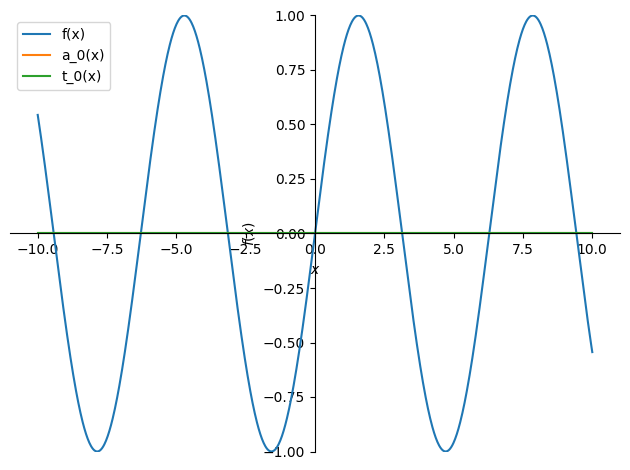

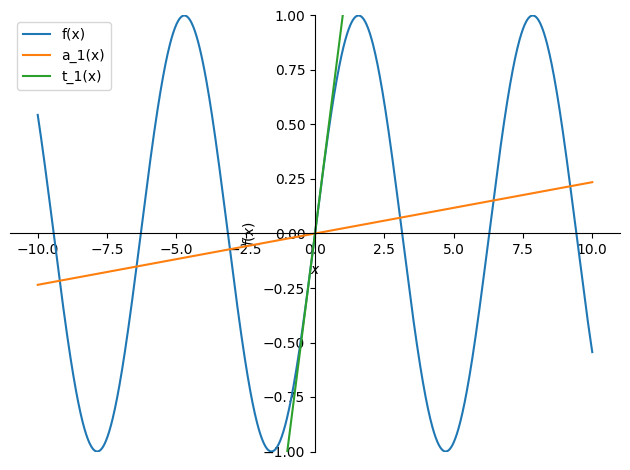

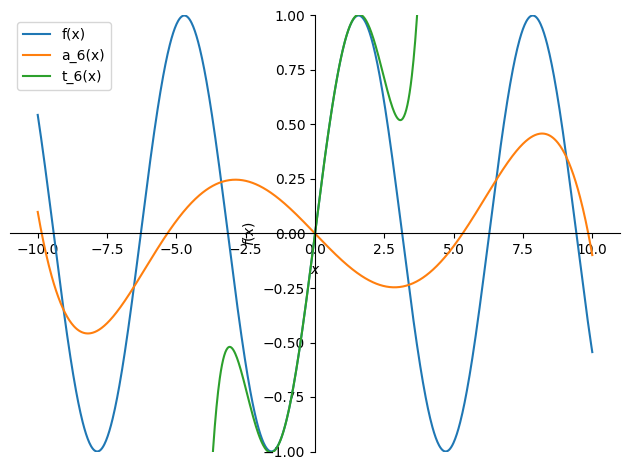

In [64]:
import numpy as np
import matplotlib.pyplot as plt

def draw(f, base, n, a=-10, b=10):
    ap = approx(f, base, n, a, b)

    plot = sp.plot(f, ap, f.series(x, 0, n+1).removeO(), (x, a, b), legend=True, show=False, ylim=(-1,1))

    plot[0].label = "f(x)"
    plot[1].label = f"a_{n}(x)"
    plot[2].label = f"t_{n}(x)"

    plot.show()

draw(sp.sin(x), lambda n: x**n, 0)
draw(sp.sin(x), lambda n: x**n, 1)
draw(sp.sin(x), lambda n: x**n, 6)

# Base: x**n

## Func: sin(10*x)

0

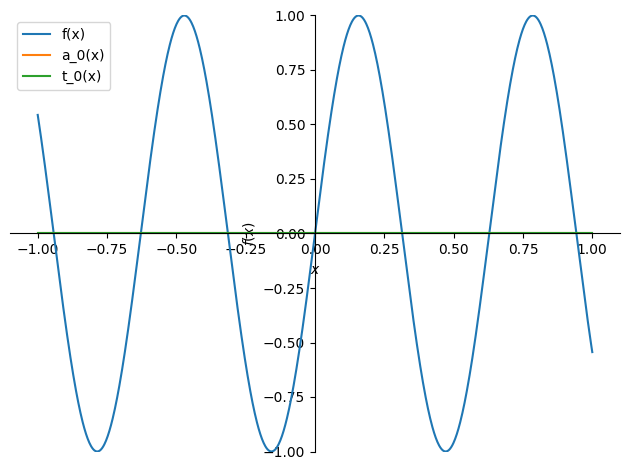

  ⎛3⋅sin(10)   3⋅cos(10)⎞
x⋅⎜───────── - ─────────⎟
  ⎝   100         10    ⎠

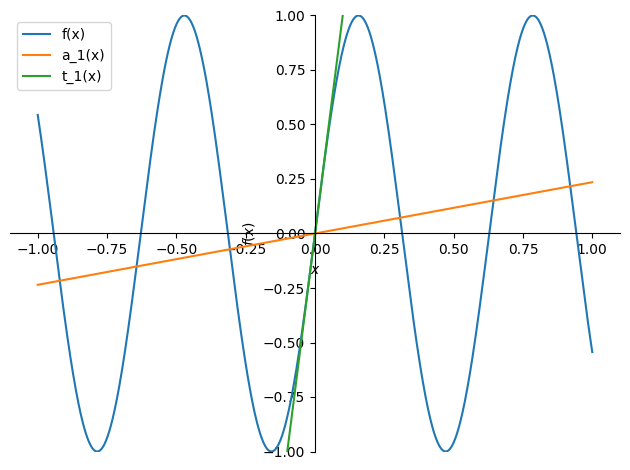

  ⎛3⋅sin(10)   3⋅cos(10)⎞
x⋅⎜───────── - ─────────⎟
  ⎝   100         10    ⎠

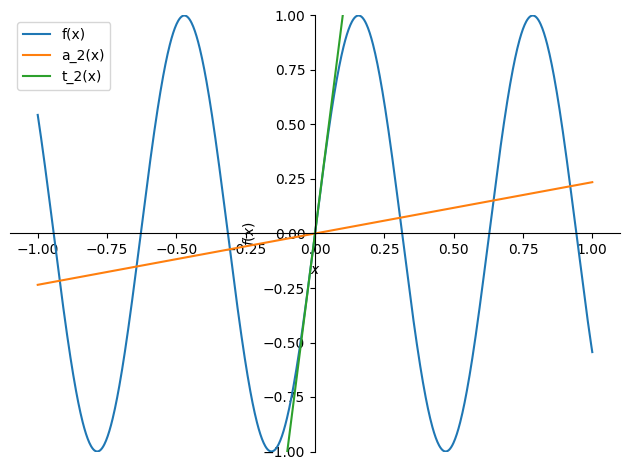

 3 ⎛819⋅sin(10)   119⋅cos(10)⎞     ⎛237⋅cos(10)   2337⋅sin(10)⎞
x ⋅⎜─────────── - ───────────⎟ + x⋅⎜─────────── - ────────────⎟
   ⎝    800           80     ⎠     ⎝    400           4000    ⎠

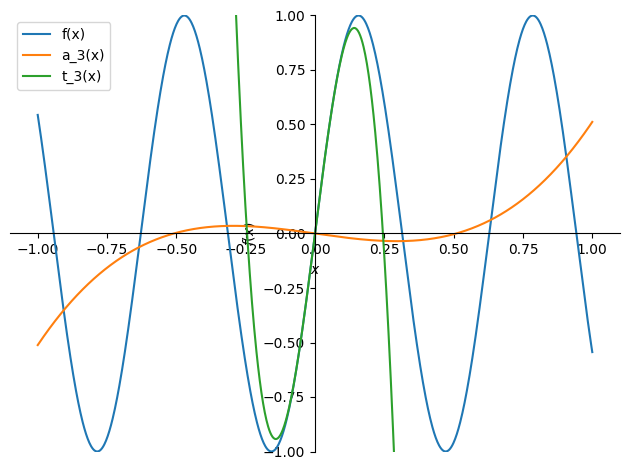

 3 ⎛819⋅sin(10)   119⋅cos(10)⎞     ⎛237⋅cos(10)   2337⋅sin(10)⎞
x ⋅⎜─────────── - ───────────⎟ + x⋅⎜─────────── - ────────────⎟
   ⎝    800           80     ⎠     ⎝    400           4000    ⎠

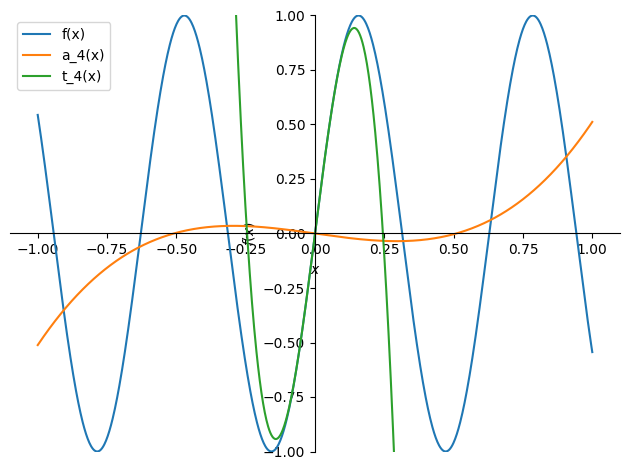

 5 ⎛15099777⋅sin(10)   61677⋅cos(10)⎞    3 ⎛  16947⋅cos(10)   1513953⋅sin(10)⎞ ↪
x ⋅⎜──────────────── - ─────────────⎟ + x ⋅⎜- ───────────── - ───────────────⎟ ↪
   ⎝    1600000           160000    ⎠      ⎝      16000           160000     ⎠ ↪

↪      ⎛532077⋅sin(10)   16023⋅cos(10)⎞
↪  + x⋅⎜────────────── + ─────────────⎟
↪      ⎝    320000           32000    ⎠

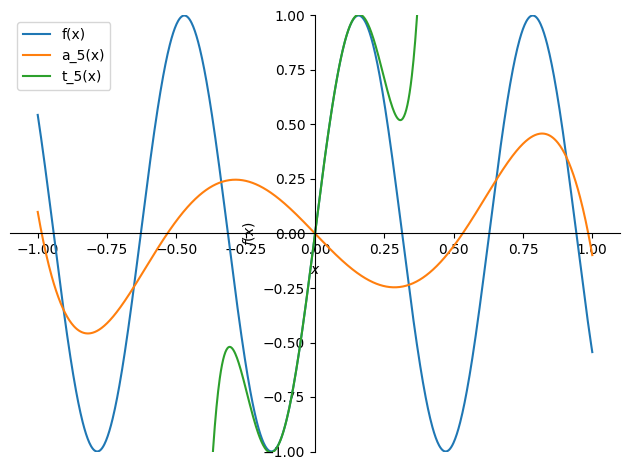

 5 ⎛15099777⋅sin(10)   61677⋅cos(10)⎞    3 ⎛  16947⋅cos(10)   1513953⋅sin(10)⎞ ↪
x ⋅⎜──────────────── - ─────────────⎟ + x ⋅⎜- ───────────── - ───────────────⎟ ↪
   ⎝    1600000           160000    ⎠      ⎝      16000           160000     ⎠ ↪

↪      ⎛532077⋅sin(10)   16023⋅cos(10)⎞
↪  + x⋅⎜────────────── + ─────────────⎟
↪      ⎝    320000           32000    ⎠

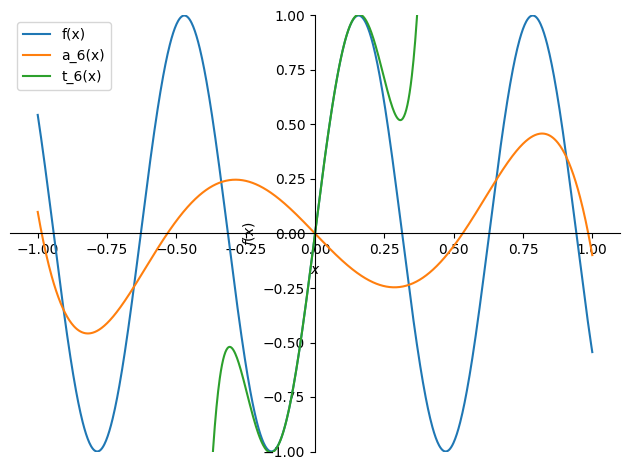

 7 ⎛304410249⋅cos(10)   669720051⋅sin(10)⎞    5 ⎛  477864387⋅sin(10)   4942067 ↪
x ⋅⎜───────────────── + ─────────────────⎟ + x ⋅⎜- ───────────────── - ─────── ↪
   ⎝     6400000            64000000     ⎠      ⎝      64000000             64 ↪

↪ 13⋅cos(10)⎞    3 ⎛43347843⋅cos(10)   22765743⋅sin(10)⎞     ⎛10355247⋅sin(10) ↪
↪ ──────────⎟ + x ⋅⎜──────────────── - ────────────────⎟ + x⋅⎜──────────────── ↪
↪ 00000     ⎠      ⎝    1280000            12800000    ⎠     ⎝    12800000     ↪

↪    4326147⋅cos(10)⎞
↪  - ───────────────⎟
↪        1280000    ⎠

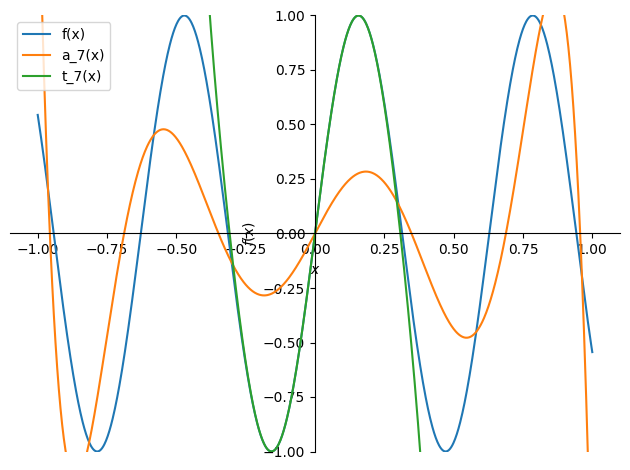

## Func: exp(x - 1)

⎛      2⎞  -2
⎝-1 + ℯ ⎠⋅ℯ  
─────────────
      2      

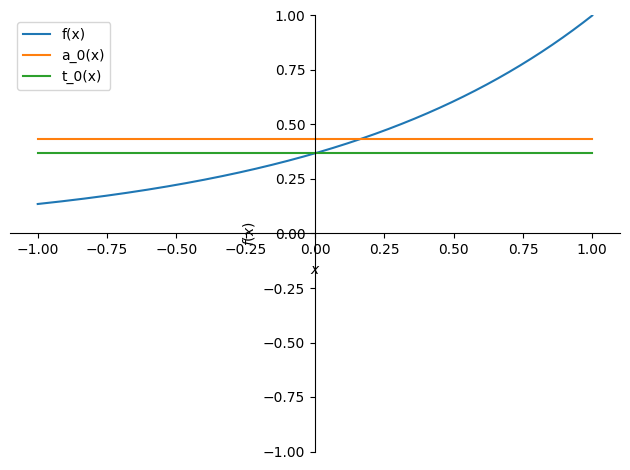

          ⎛      2⎞  -2
     -2   ⎝-1 + ℯ ⎠⋅ℯ  
3⋅x⋅ℯ   + ─────────────
                2      

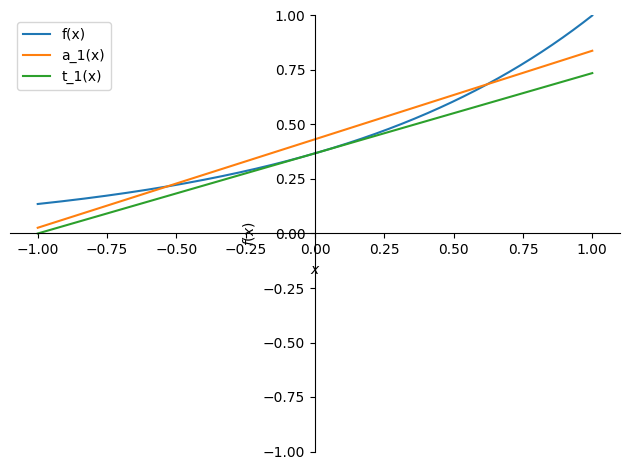

 2 ⎛           2⎞  -2             ⎛        2⎞  -2
x ⋅⎝-105 + 15⋅ℯ ⎠⋅ℯ          -2   ⎝33 - 3⋅ℯ ⎠⋅ℯ  
───────────────────── + 3⋅x⋅ℯ   + ───────────────
          4                              4       

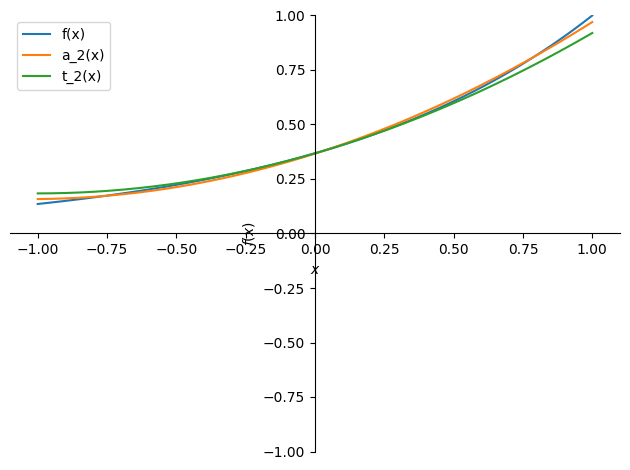

 3 ⎛            2⎞  -2    2 ⎛           2⎞  -2     ⎛            2⎞  -2   ⎛     ↪
x ⋅⎝1295 - 175⋅ℯ ⎠⋅ℯ     x ⋅⎝-105 + 15⋅ℯ ⎠⋅ℯ     x⋅⎝-765 + 105⋅ℯ ⎠⋅ℯ     ⎝33 - ↪
────────────────────── + ───────────────────── + ───────────────────── + ───── ↪
          4                        4                       4                   ↪

↪     2⎞  -2
↪  3⋅ℯ ⎠⋅ℯ  
↪ ──────────
↪   4       

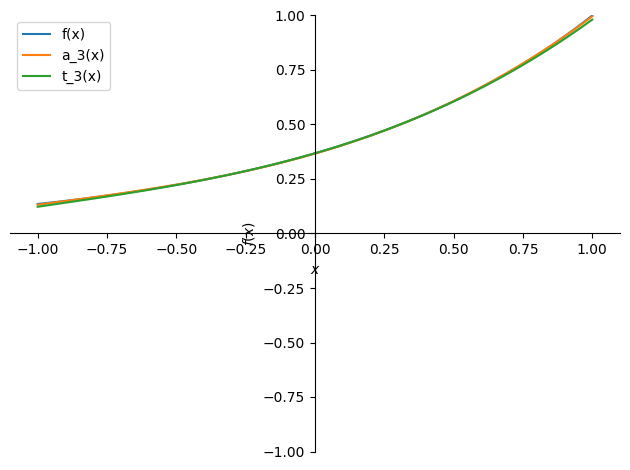

 4 ⎛               2⎞  -2    3 ⎛            2⎞  -2    2 ⎛              2⎞  -2  ↪
x ⋅⎝-41895 + 5670⋅ℯ ⎠⋅ℯ     x ⋅⎝1295 - 175⋅ℯ ⎠⋅ℯ     x ⋅⎝17850 - 2415⋅ℯ ⎠⋅ℯ    ↪
───────────────────────── + ────────────────────── + ────────────────────────  ↪
            8                         4                         4              ↪

↪     ⎛            2⎞  -2   ⎛             2⎞  -2
↪   x⋅⎝-765 + 105⋅ℯ ⎠⋅ℯ     ⎝-3525 + 480⋅ℯ ⎠⋅ℯ  
↪ + ───────────────────── + ────────────────────
↪             4                      8          

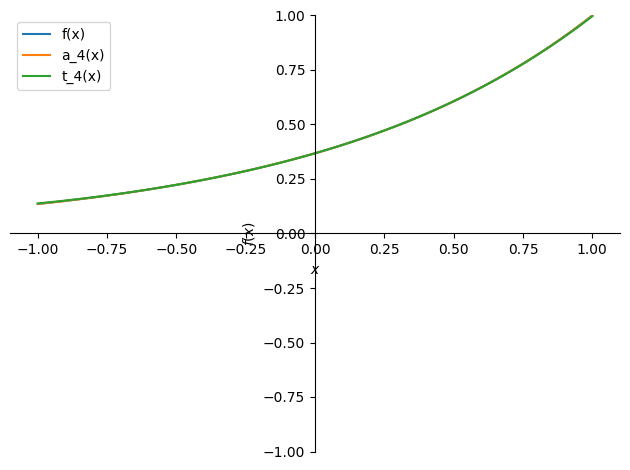

 5 ⎛                  2⎞  -2    4 ⎛               2⎞  -2    3 ⎛                ↪
x ⋅⎝1684683 - 227997⋅ℯ ⎠⋅ℯ     x ⋅⎝-41895 + 5670⋅ℯ ⎠⋅ℯ     x ⋅⎝-933345 + 12631 ↪
──────────────────────────── + ───────────────────────── + ─────────────────── ↪
             16                            8                            8      ↪

↪    2⎞  -2    2 ⎛              2⎞  -2     ⎛                2⎞  -2   ⎛         ↪
↪ 5⋅ℯ ⎠⋅ℯ     x ⋅⎝17850 - 2415⋅ℯ ⎠⋅ℯ     x⋅⎝398055 - 53865⋅ℯ ⎠⋅ℯ     ⎝-3525 +  ↪
↪ ───────── + ──────────────────────── + ───────────────────────── + ───────── ↪
↪                        4                          16                         ↪

↪      2⎞  -2
↪ 480⋅ℯ ⎠⋅ℯ  
↪ ───────────
↪ 8          

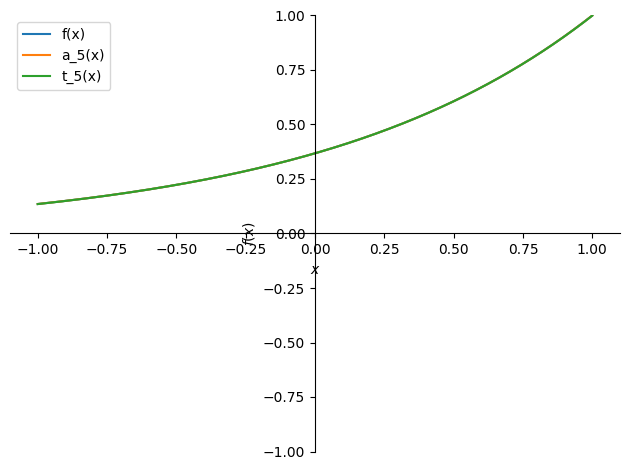

 6 ⎛                      2⎞  -2    5 ⎛                  2⎞  -2    4 ⎛         ↪
x ⋅⎝-81102021 + 10975965⋅ℯ ⎠⋅ℯ     x ⋅⎝1684683 - 227997⋅ℯ ⎠⋅ℯ     x ⋅⎝11042608 ↪
──────────────────────────────── + ──────────────────────────── + ──────────── ↪
               32                               16                             ↪

↪               2⎞  -2    3 ⎛                  2⎞  -2    2 ⎛                   ↪
↪ 5 - 14944545⋅ℯ ⎠⋅ℯ     x ⋅⎝-933345 + 126315⋅ℯ ⎠⋅ℯ     x ⋅⎝-36721755 + 496975 ↪
↪ ──────────────────── + ──────────────────────────── + ────────────────────── ↪
↪    32                               8                               32       ↪

↪    2⎞  -2     ⎛                2⎞  -2   ⎛                  2⎞  -2
↪ 5⋅ℯ ⎠⋅ℯ     x⋅⎝398055 - 53865⋅ℯ ⎠⋅ℯ     ⎝1741355 - 235655⋅ℯ ⎠⋅ℯ  
↪ ───────── + ───────────────────────── + ─────────────────────────
↪                        16                          32            

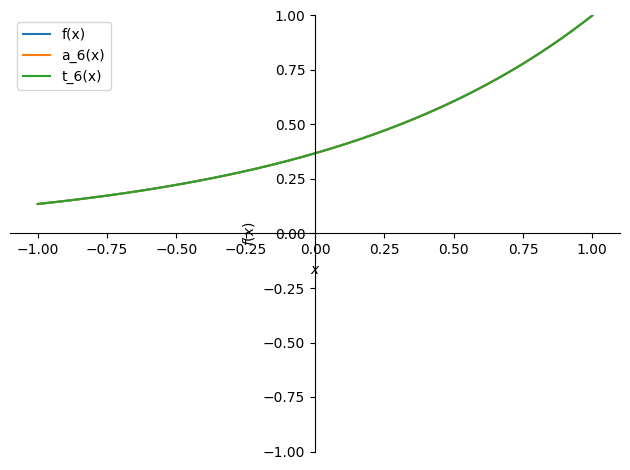

 7 ⎛                        2⎞  -2    6 ⎛                      2⎞  -2    5 ⎛   ↪
x ⋅⎝1137457035 - 153938070⋅ℯ ⎠⋅ℯ     x ⋅⎝-81102021 + 10975965⋅ℯ ⎠⋅ℯ     x ⋅⎝-1 ↪
────────────────────────────────── + ──────────────────────────────── + ────── ↪
                16                                  32                         ↪

↪                        2⎞  -2    4 ⎛                      2⎞  -2    3 ⎛      ↪
↪ 835745912 + 248441193⋅ℯ ⎠⋅ℯ     x ⋅⎝110426085 - 14944545⋅ℯ ⎠⋅ℯ     x ⋅⎝83332 ↪
↪ ───────────────────────────── + ──────────────────────────────── + ───────── ↪
↪           16                                   32                            ↪

↪                   2⎞  -2    2 ⎛                     2⎞  -2     ⎛             ↪
↪ 9035 - 112778820⋅ℯ ⎠⋅ℯ     x ⋅⎝-36721755 + 4969755⋅ℯ ⎠⋅ℯ     x⋅⎝-92401470 +  ↪
↪ ──────────────────────── + ─────────────────────────────── + ─────────────── ↪
↪       16                                 32                                1 ↪

↪           2⎞  -2   ⎛   

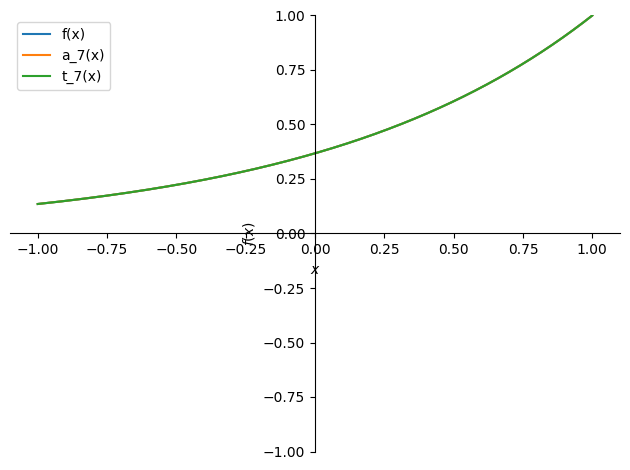

## Func: x**3

0

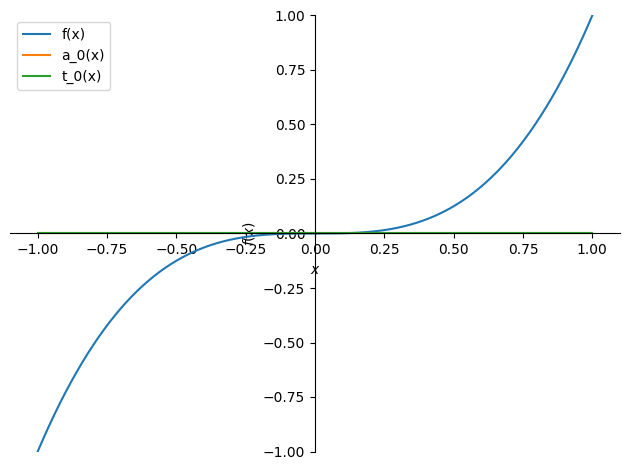

3⋅x
───
 5 

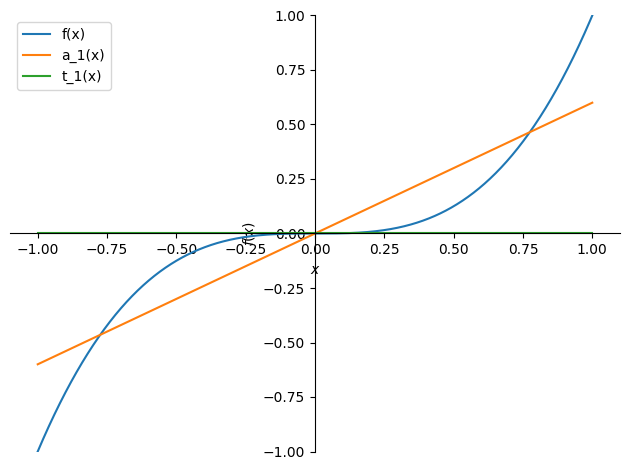

3⋅x
───
 5 

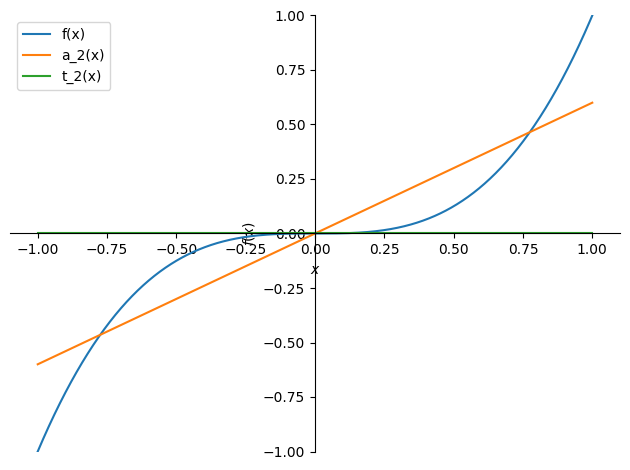

 3
x 

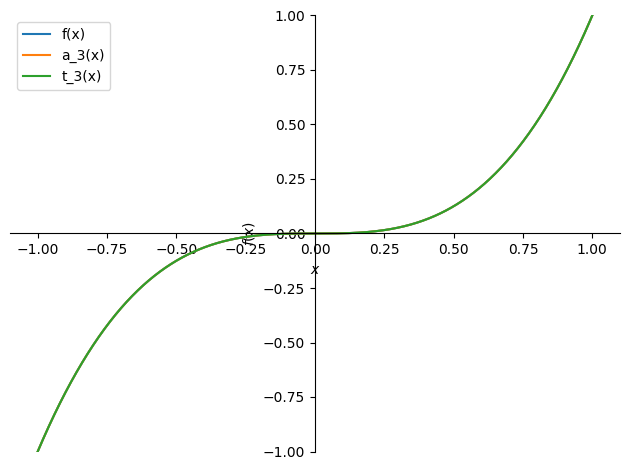

 3
x 

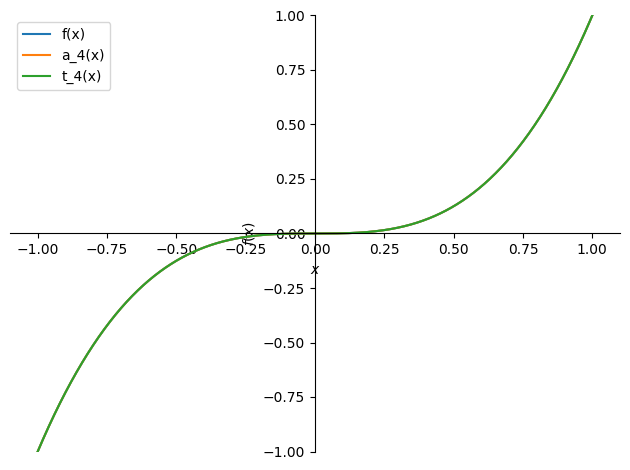

 3
x 

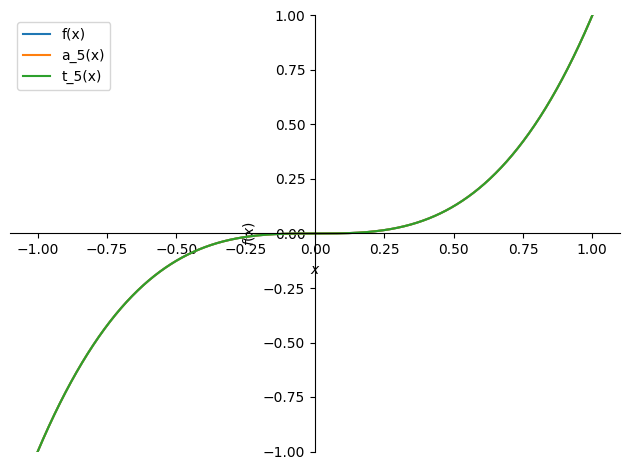

 3
x 

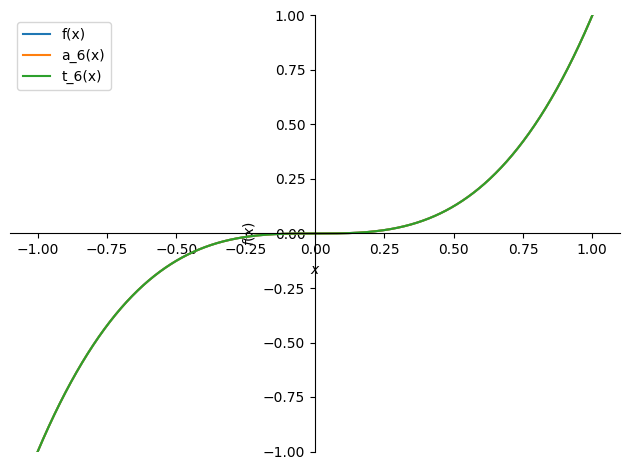

 3
x 

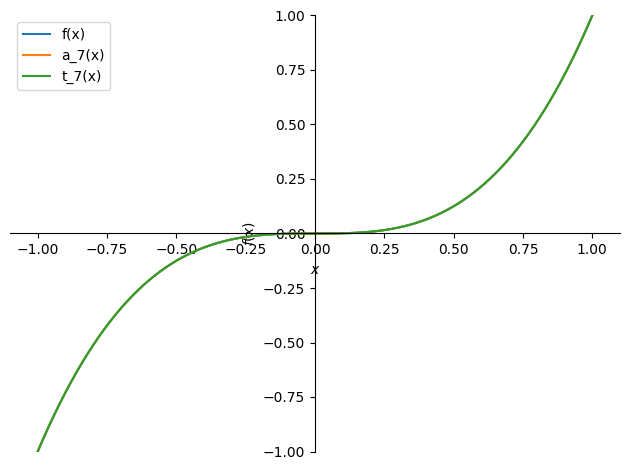

# Base: legendre(n, x)

## Func: sin(10*x)

0

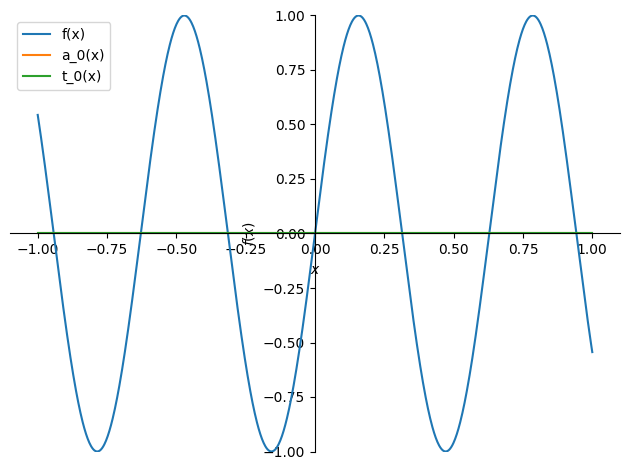

  ⎛3⋅sin(10)   3⋅cos(10)⎞
x⋅⎜───────── - ─────────⎟
  ⎝   100         10    ⎠

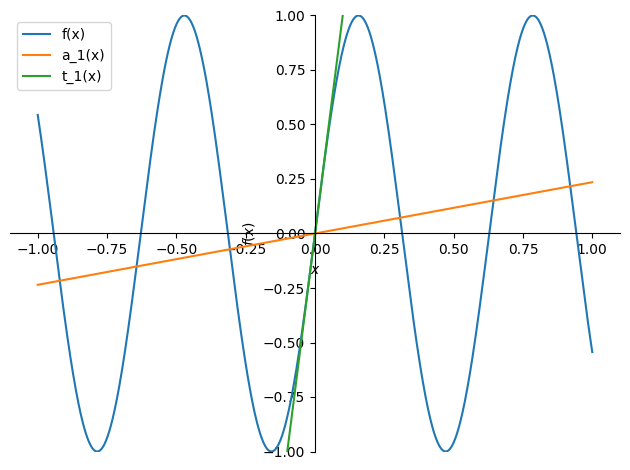

  ⎛3⋅sin(10)   3⋅cos(10)⎞
x⋅⎜───────── - ─────────⎟
  ⎝   100         10    ⎠

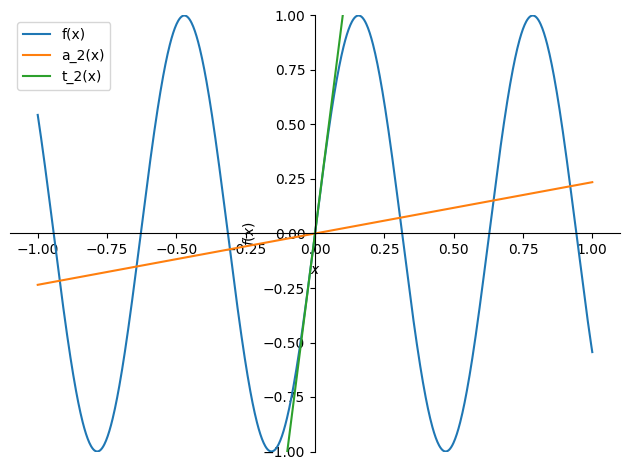

                            ⎛   3      ⎞                            
  ⎛3⋅sin(10)   3⋅cos(10)⎞   ⎜5⋅x    3⋅x⎟ ⎛819⋅sin(10)   119⋅cos(10)⎞
x⋅⎜───────── - ─────────⎟ + ⎜──── - ───⎟⋅⎜─────────── - ───────────⎟
  ⎝   100         10    ⎠   ⎝ 2      2 ⎠ ⎝   2000           200    ⎠

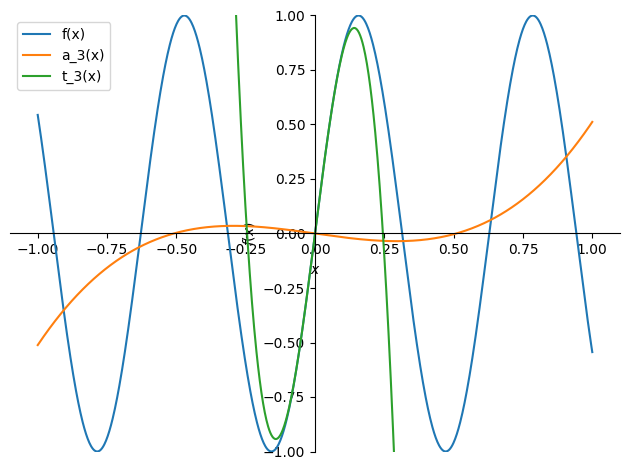

                            ⎛   3      ⎞                            
  ⎛3⋅sin(10)   3⋅cos(10)⎞   ⎜5⋅x    3⋅x⎟ ⎛819⋅sin(10)   119⋅cos(10)⎞
x⋅⎜───────── - ─────────⎟ + ⎜──── - ───⎟⋅⎜─────────── - ───────────⎟
  ⎝   100         10    ⎠   ⎝ 2      2 ⎠ ⎝   2000           200    ⎠

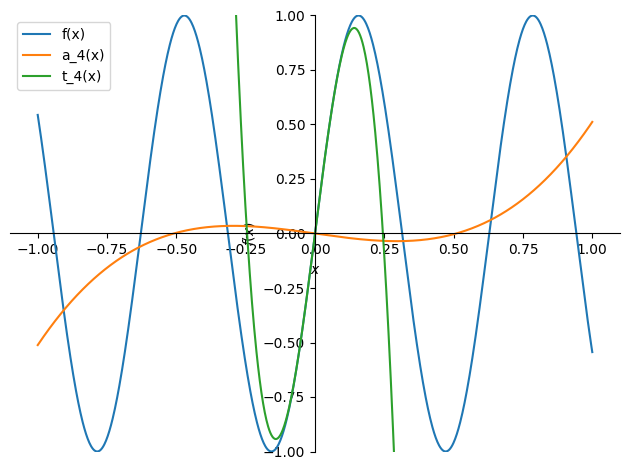

                            ⎛   3      ⎞                                       ↪
  ⎛3⋅sin(10)   3⋅cos(10)⎞   ⎜5⋅x    3⋅x⎟ ⎛819⋅sin(10)   119⋅cos(10)⎞   ⎛239679 ↪
x⋅⎜───────── - ─────────⎟ + ⎜──── - ───⎟⋅⎜─────────── - ───────────⎟ + ⎜────── ↪
  ⎝   100         10    ⎠   ⎝ 2      2 ⎠ ⎝   2000           200    ⎠   ⎝    20 ↪

↪                         ⎛    5       3       ⎞
↪ ⋅sin(10)   979⋅cos(10)⎞ ⎜63⋅x    35⋅x    15⋅x⎟
↪ ──────── - ───────────⎟⋅⎜───── - ───── + ────⎟
↪ 0000          20000   ⎠ ⎝  8       4      8  ⎠

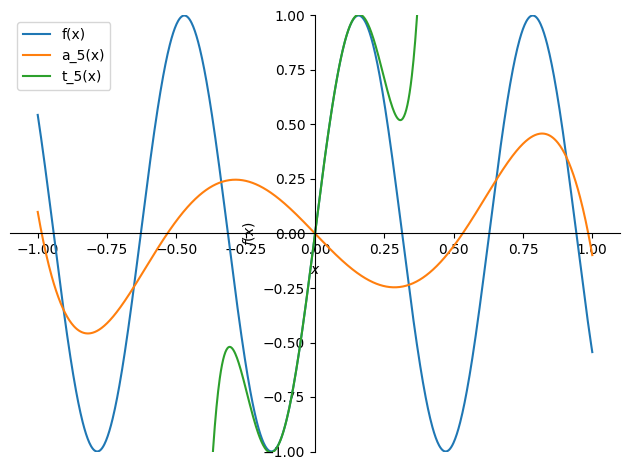

                            ⎛   3      ⎞                                       ↪
  ⎛3⋅sin(10)   3⋅cos(10)⎞   ⎜5⋅x    3⋅x⎟ ⎛819⋅sin(10)   119⋅cos(10)⎞   ⎛239679 ↪
x⋅⎜───────── - ─────────⎟ + ⎜──── - ───⎟⋅⎜─────────── - ───────────⎟ + ⎜────── ↪
  ⎝   100         10    ⎠   ⎝ 2      2 ⎠ ⎝   2000           200    ⎠   ⎝    20 ↪

↪                         ⎛    5       3       ⎞
↪ ⋅sin(10)   979⋅cos(10)⎞ ⎜63⋅x    35⋅x    15⋅x⎟
↪ ──────── - ───────────⎟⋅⎜───── - ───── + ────⎟
↪ 0000          20000   ⎠ ⎝  8       4      8  ⎠

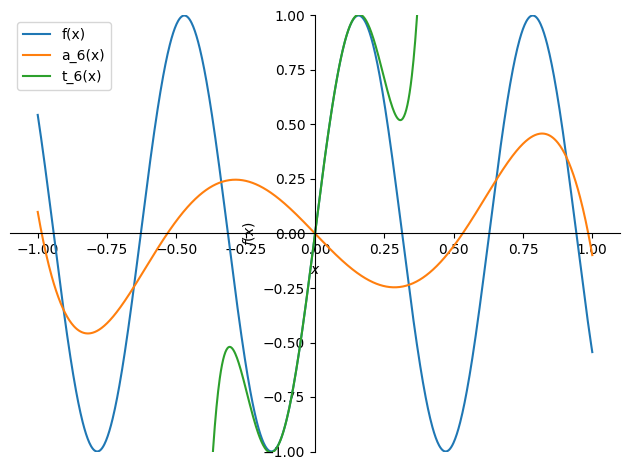

                            ⎛   3      ⎞                                       ↪
  ⎛3⋅sin(10)   3⋅cos(10)⎞   ⎜5⋅x    3⋅x⎟ ⎛819⋅sin(10)   119⋅cos(10)⎞   ⎛239679 ↪
x⋅⎜───────── - ─────────⎟ + ⎜──── - ───⎟⋅⎜─────────── - ───────────⎟ + ⎜────── ↪
  ⎝   100         10    ⎠   ⎝ 2      2 ⎠ ⎝   2000           200    ⎠   ⎝    20 ↪

↪                         ⎛    5       3       ⎞                               ↪
↪ ⋅sin(10)   979⋅cos(10)⎞ ⎜63⋅x    35⋅x    15⋅x⎟   ⎛709581⋅cos(10)   1561119⋅s ↪
↪ ──────── - ───────────⎟⋅⎜───── - ───── + ────⎟ + ⎜────────────── + ───────── ↪
↪ 0000          20000   ⎠ ⎝  8       4      8  ⎠   ⎝    400000           40000 ↪

↪         ⎛     7        5        3       ⎞
↪ in(10)⎞ ⎜429⋅x    693⋅x    315⋅x    35⋅x⎟
↪ ──────⎟⋅⎜────── - ────── + ────── - ────⎟
↪ 00    ⎠ ⎝  16       16       16      16 ⎠

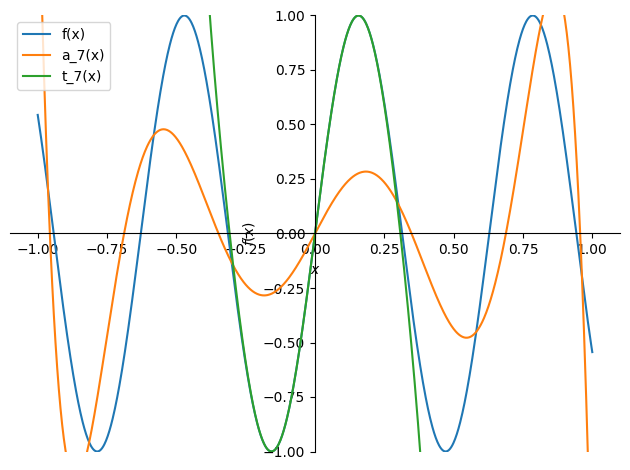

## Func: exp(x - 1)

⎛      2⎞  -2
⎝-1 + ℯ ⎠⋅ℯ  
─────────────
      2      

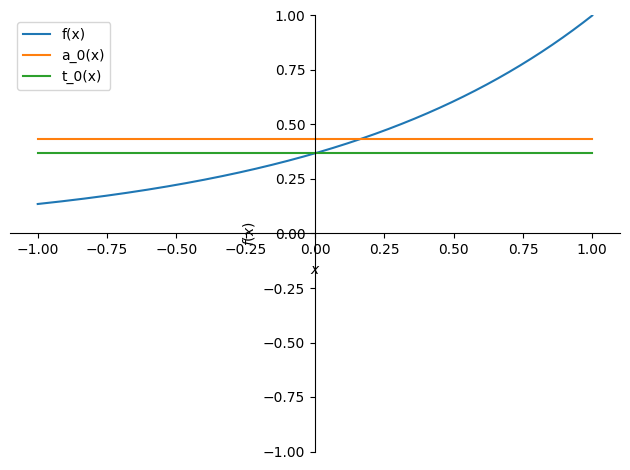

          ⎛      2⎞  -2
     -2   ⎝-1 + ℯ ⎠⋅ℯ  
3⋅x⋅ℯ   + ─────────────
                2      

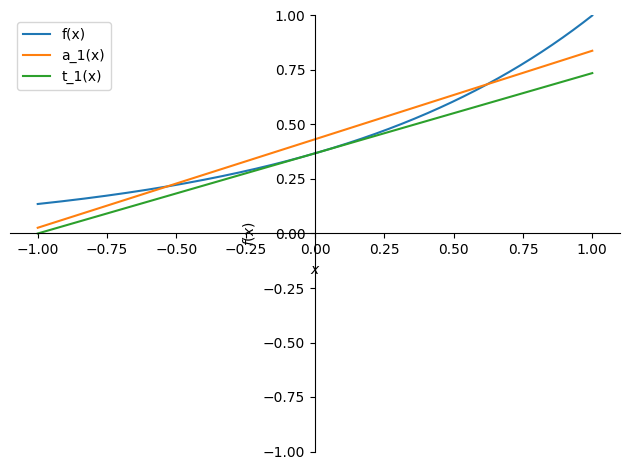

                       ⎛   2    ⎞                    
          ⎛         2⎞ ⎜3⋅x    1⎟  -2                
          ⎝-35 + 5⋅ℯ ⎠⋅⎜──── - ─⎟⋅ℯ     ⎛      2⎞  -2
     -2                ⎝ 2     2⎠       ⎝-1 + ℯ ⎠⋅ℯ  
3⋅x⋅ℯ   + ─────────────────────────── + ─────────────
                       2                      2      

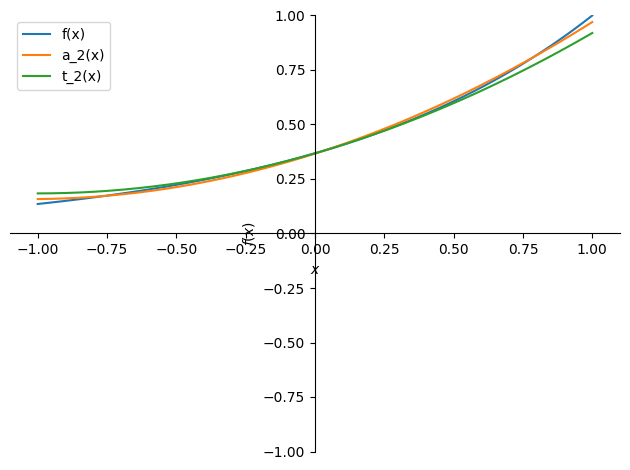

                       ⎛   2    ⎞                     ⎛   3      ⎞             ↪
          ⎛         2⎞ ⎜3⋅x    1⎟  -2   ⎛          2⎞ ⎜5⋅x    3⋅x⎟  -2         ↪
          ⎝-35 + 5⋅ℯ ⎠⋅⎜──── - ─⎟⋅ℯ     ⎝259 - 35⋅ℯ ⎠⋅⎜──── - ───⎟⋅ℯ     ⎛     ↪
     -2                ⎝ 2     2⎠                     ⎝ 2      2 ⎠       ⎝-1 + ↪
3⋅x⋅ℯ   + ─────────────────────────── + ────────────────────────────── + ───── ↪
                       2                              2                        ↪

↪         
↪         
↪   2⎞  -2
↪  ℯ ⎠⋅ℯ  
↪ ────────
↪  2      

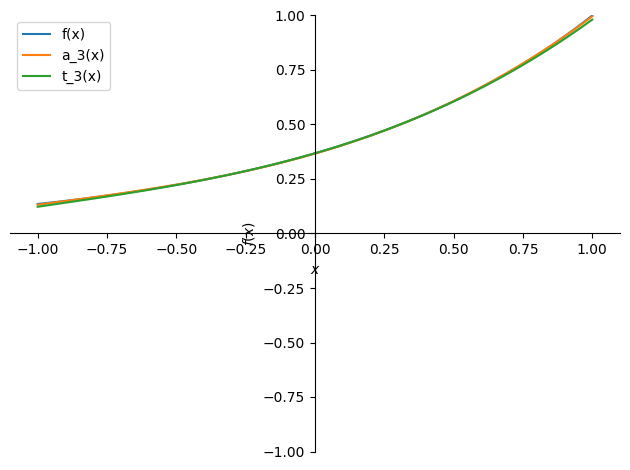

                       ⎛   2    ⎞                     ⎛   3      ⎞             ↪
          ⎛         2⎞ ⎜3⋅x    1⎟  -2   ⎛          2⎞ ⎜5⋅x    3⋅x⎟  -2         ↪
          ⎝-35 + 5⋅ℯ ⎠⋅⎜──── - ─⎟⋅ℯ     ⎝259 - 35⋅ℯ ⎠⋅⎜──── - ───⎟⋅ℯ           ↪
     -2                ⎝ 2     2⎠                     ⎝ 2      2 ⎠       ⎛     ↪
3⋅x⋅ℯ   + ─────────────────────────── + ────────────────────────────── + ⎝-119 ↪
                       2                              2                        ↪

↪                                                    
↪                                                    
↪             ⎛    4       2    ⎞       ⎛      2⎞  -2
↪          2⎞ ⎜35⋅x    15⋅x    3⎟  -2   ⎝-1 + ℯ ⎠⋅ℯ  
↪ 7 + 162⋅ℯ ⎠⋅⎜───── - ───── + ─⎟⋅ℯ   + ─────────────
↪             ⎝  8       4     8⎠             2      

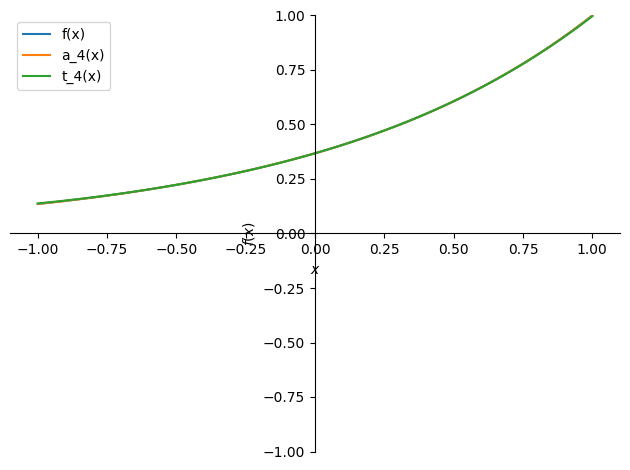

                       ⎛   2    ⎞                     ⎛   3      ⎞             ↪
          ⎛         2⎞ ⎜3⋅x    1⎟  -2   ⎛          2⎞ ⎜5⋅x    3⋅x⎟  -2         ↪
          ⎝-35 + 5⋅ℯ ⎠⋅⎜──── - ─⎟⋅ℯ     ⎝259 - 35⋅ℯ ⎠⋅⎜──── - ───⎟⋅ℯ           ↪
     -2                ⎝ 2     2⎠                     ⎝ 2      2 ⎠       ⎛     ↪
3⋅x⋅ℯ   + ─────────────────────────── + ────────────────────────────── + ⎝-119 ↪
                       2                              2                        ↪

↪                                                         ⎛    5       3       ↪
↪                                       ⎛              2⎞ ⎜63⋅x    35⋅x    15⋅ ↪
↪             ⎛    4       2    ⎞       ⎝26741 - 3619⋅ℯ ⎠⋅⎜───── - ───── + ─── ↪
↪          2⎞ ⎜35⋅x    15⋅x    3⎟  -2                     ⎝  8       4      8  ↪
↪ 7 + 162⋅ℯ ⎠⋅⎜───── - ───── + ─⎟⋅ℯ   + ────────────────────────────────────── ↪
↪             ⎝  8       4     8⎠                            2                 ↪

↪  ⎞                    
↪

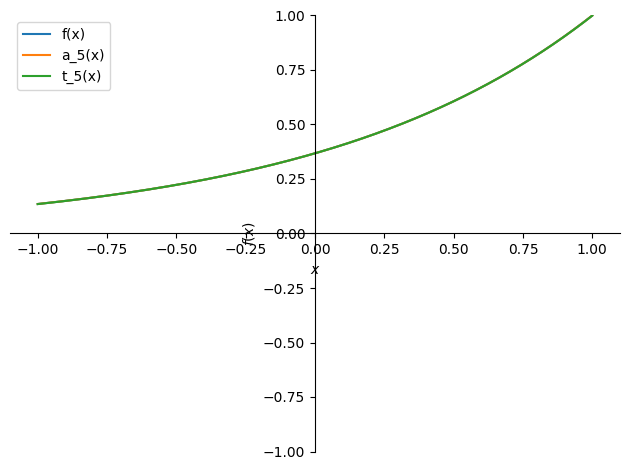

                       ⎛   2    ⎞                     ⎛   3      ⎞             ↪
          ⎛         2⎞ ⎜3⋅x    1⎟  -2   ⎛          2⎞ ⎜5⋅x    3⋅x⎟  -2         ↪
          ⎝-35 + 5⋅ℯ ⎠⋅⎜──── - ─⎟⋅ℯ     ⎝259 - 35⋅ℯ ⎠⋅⎜──── - ───⎟⋅ℯ           ↪
     -2                ⎝ 2     2⎠                     ⎝ 2      2 ⎠       ⎛     ↪
3⋅x⋅ℯ   + ─────────────────────────── + ────────────────────────────── + ⎝-119 ↪
                       2                              2                        ↪

↪                                                         ⎛    5       3       ↪
↪                                       ⎛              2⎞ ⎜63⋅x    35⋅x    15⋅ ↪
↪             ⎛    4       2    ⎞       ⎝26741 - 3619⋅ℯ ⎠⋅⎜───── - ───── + ─── ↪
↪          2⎞ ⎜35⋅x    15⋅x    3⎟  -2                     ⎝  8       4      8  ↪
↪ 7 + 162⋅ℯ ⎠⋅⎜───── - ───── + ─⎟⋅ℯ   + ────────────────────────────────────── ↪
↪             ⎝  8       4     8⎠                            2                 ↪

↪  ⎞                      

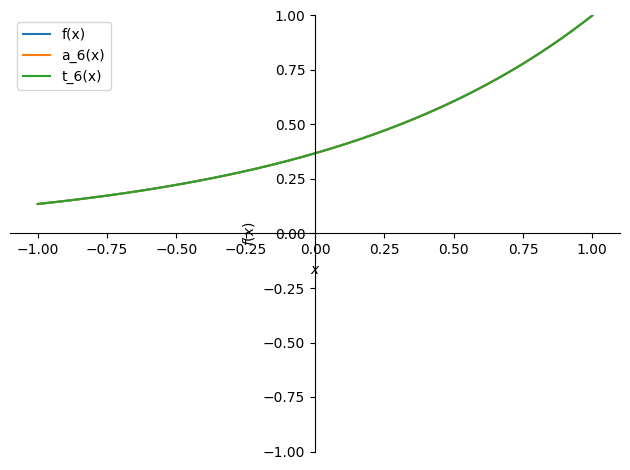

                       ⎛   2    ⎞                     ⎛   3      ⎞             ↪
          ⎛         2⎞ ⎜3⋅x    1⎟  -2   ⎛          2⎞ ⎜5⋅x    3⋅x⎟  -2         ↪
          ⎝-35 + 5⋅ℯ ⎠⋅⎜──── - ─⎟⋅ℯ     ⎝259 - 35⋅ℯ ⎠⋅⎜──── - ───⎟⋅ℯ           ↪
     -2                ⎝ 2     2⎠                     ⎝ 2      2 ⎠       ⎛     ↪
3⋅x⋅ℯ   + ─────────────────────────── + ────────────────────────────── + ⎝-119 ↪
                       2                              2                        ↪

↪                                                         ⎛    5       3       ↪
↪                                       ⎛              2⎞ ⎜63⋅x    35⋅x    15⋅ ↪
↪             ⎛    4       2    ⎞       ⎝26741 - 3619⋅ℯ ⎠⋅⎜───── - ───── + ─── ↪
↪          2⎞ ⎜35⋅x    15⋅x    3⎟  -2                     ⎝  8       4      8  ↪
↪ 7 + 162⋅ℯ ⎠⋅⎜───── - ───── + ─⎟⋅ℯ   + ────────────────────────────────────── ↪
↪             ⎝  8       4     8⎠                            2                 ↪

↪  ⎞                      

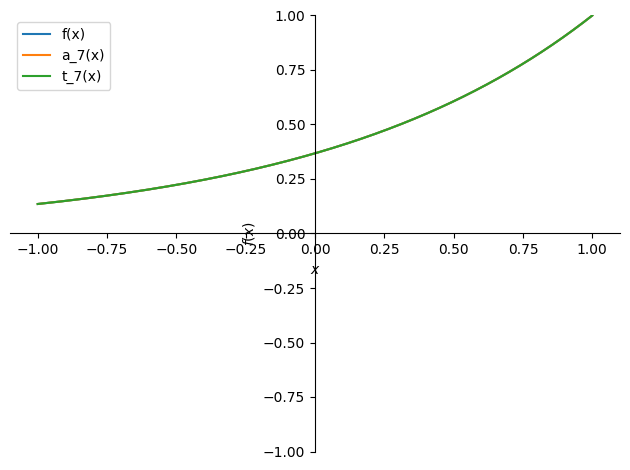

## Func: x**3

0

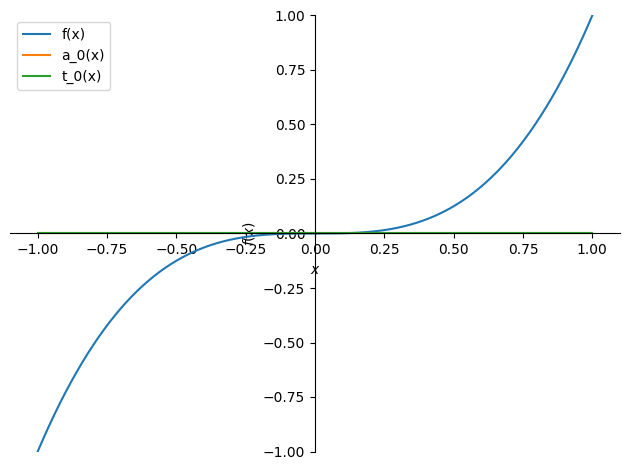

3⋅x
───
 5 

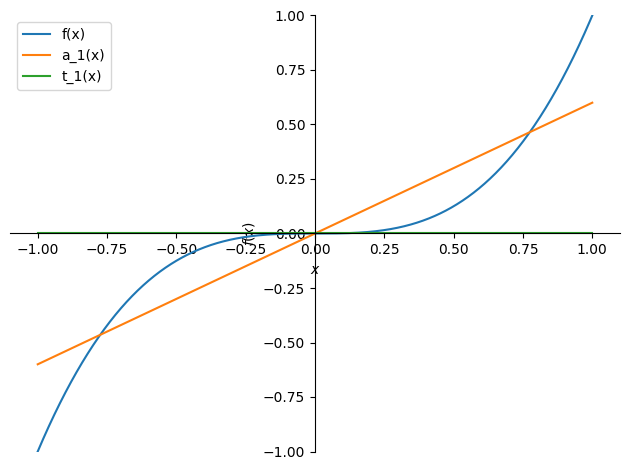

3⋅x
───
 5 

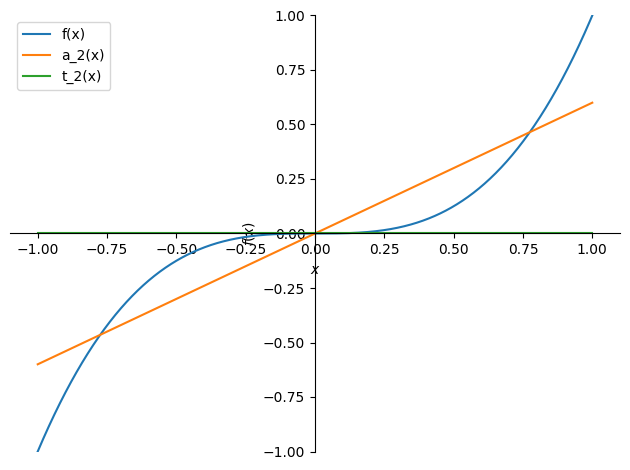

 3
x 

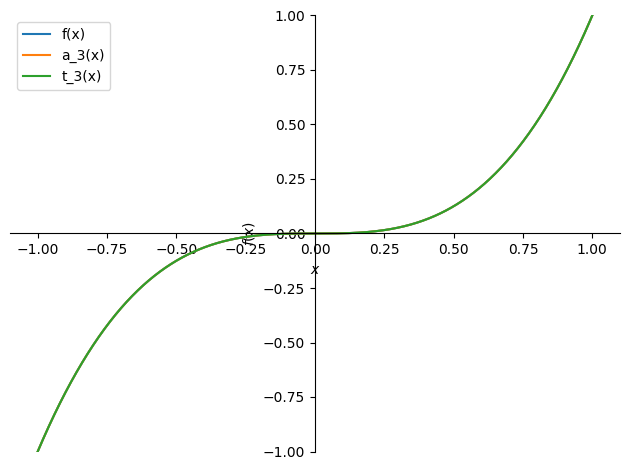

 3
x 

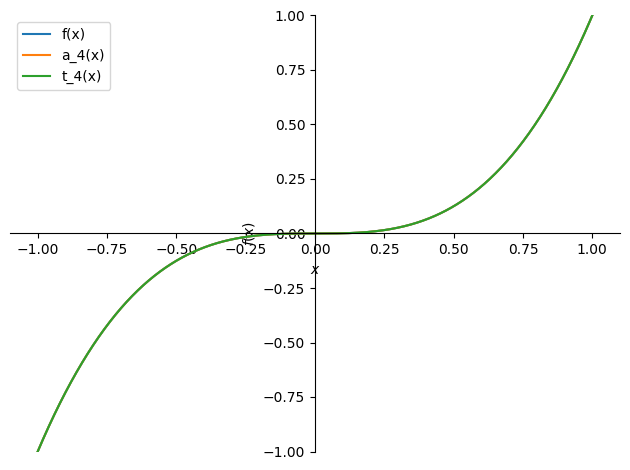

 3
x 

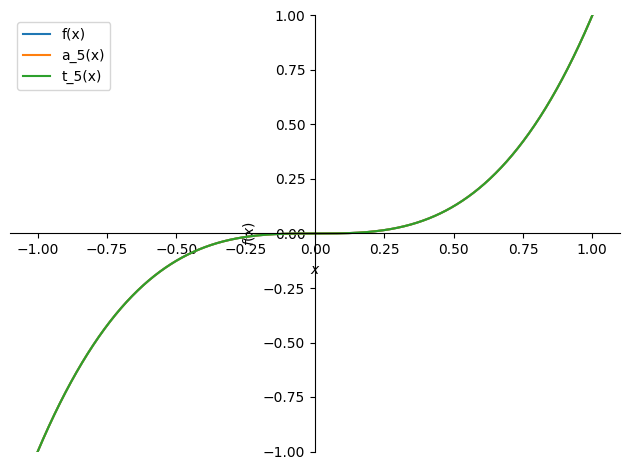

 3
x 

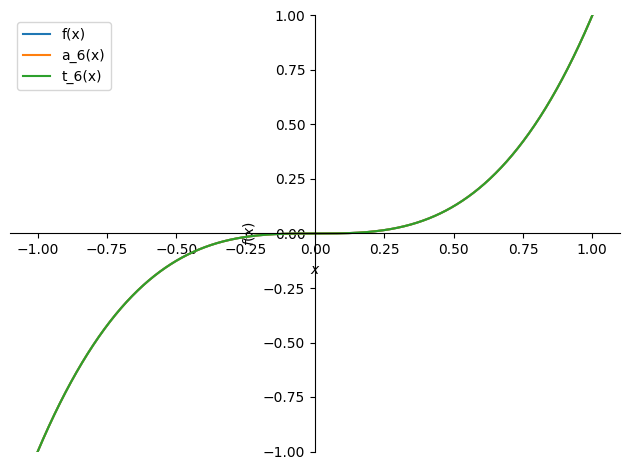

 3
x 

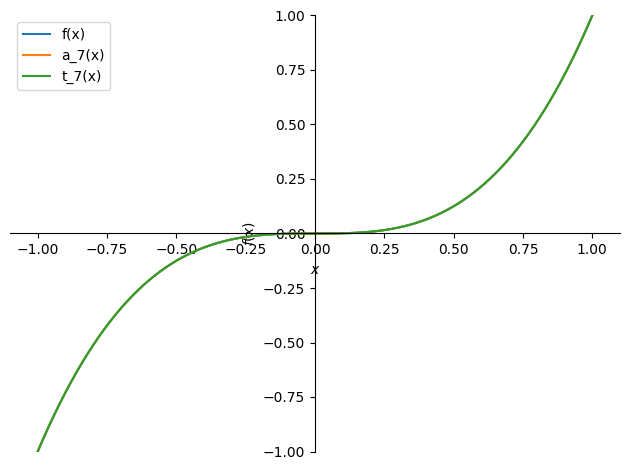

In [72]:
for base in [lambda n: x**n, lambda n: sp.legendre(n, x)]:
    b = base(sp.symbols("n"))
    display(Markdown(f"# Base: {b}"))
    
    for f in [sp.sin(x*10), sp.exp(x-1), x**3]:
        display(Markdown(f"## Func: {f}"))

        for n in range(8):
            ap = approx(f, base, n, -1, 1)

            display(ap)

            draw(f, base, n, -1, 1)